<b>Group Number:</b> 
<br><b>Name Group Member 1:</b> 
<br><b>u-Kürzel Group Member 1:</b> 
<br><b>Name Group Member 2:</b> 
<br><b>u-Kürzel Group Member 2:</b> 

# Preparing the Titanic dataset

In this exercise we need to prepare the Titanic dataset for the upcoming tasks in supervised learning. With two algorithms we want to classify or predict wether a passenger of the titanic survived or not. First of all we need to load the necessary libraries which will help us to explore and visualize the data. Therefore we will use panda dataframes a lot.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

%matplotlib inline
import matplotlib.pyplot as plt
from collections import Counter

from typing import *

from lama.test_functions import SupervisedLearning_Tests
from lama.helper import lama_del_wrap

# Instantiate test function class
test_func = SupervisedLearning_Tests()

# Fix seed for tests
np.random.seed(42)

<div class="alert alert-block alert-success">
<b>Task:</b> 
<ul>
<li> Load the Titanic dataset (train and test) with pandas
<li> Display the first 5 rows of the train dataset
</li>
</ul>
</div>

In [2]:
# Load the train and test datasets from the CSV files

train: pd.DataFrame
test: pd.DataFrame

# STUDENT CODE HERE (1pt)
train: str = "data/train.csv"
test: str = "data/test.csv"
train = pd.read_csv(train)
display(train.head(5))
test = pd.read_csv(test)
display(test.head(5))
# STUDENT CODE until HERE

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [3]:
# Combines both datasets in a list that can be iterated over in the following data preparation
datasets = [train, test]

# Display the first 5 rows of the train dataset
# STUDENT CODE HERE  (1pt) 
display(train.head(5))
# STUDENT CODE until HERE

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Print the columns of the data frame
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [5]:
# Inspect the data, *info* can be used to show how complete or incomplete the
# dataset is
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<div class="alert alert-block alert-success">
<b>Question:</b> Answer the following questions in the answer block below and indicate which question your answer is referring to:
    
1. What do you see when we print the column names and how can you interpret them? Describe the features! Make note of any informations about the features, that are important for preprocessing the data!
<br>
2. What do you see when you look at the dataset? Which irregularities within the dataset are important to know, when preparing the data?
    
</div>
<div class="alert alert-block alert-success">
<b>Your Answer:</b> 

1. The features:
<ul>
<li><strong>Survived</strong>:  </li>
<li><strong>Pclass</strong>: </li>
<li><strong>Name</strong>: </li>
<li><strong>Sex</strong>: )</li>
<li><strong>Age</strong>: </li>
<li><strong>SibSp</strong>: </li>
<li><strong>Parch</strong>: </li>
<li><strong>Ticket</strong>: </li>
<li><strong>Fare</strong>: </li>
<li><strong>Cabin</strong> </li>
<li><strong>Embarked</strong>: </li>
</ul>



2. 

</div>

## Task 1.1: Visualizing the Data 

After investigating the tables and the description of the titanic dataset we cannot say a lot about the data yet. We do not have any information about the distribution and correlation of variables with respect to the individual chances of survival. In order to get a better understanding of the dataset, it is beneficial to visualize it.

A well kown tool to visualize data using Python is the library *matplotlib*. It is well [documented](https://matplotlib.org/) and allows for extensive customizability. (You used it already.)

Additionally we will introduce [*seaborn*](https://seaborn.pydata.org/), a wrapper which uses matplotlib, but offers a higher-level interface for visualizing data.

<div class="alert alert-block alert-info">
<b>Note:</b> With the first 3 plots we want to investigate:
<ul>
<li> How many passenger of the titanic survived the tragedy
<li>  The total number of passengers with respect to its class
<li>  The passengers sorted by their ages
</li>
</ul>
</div>

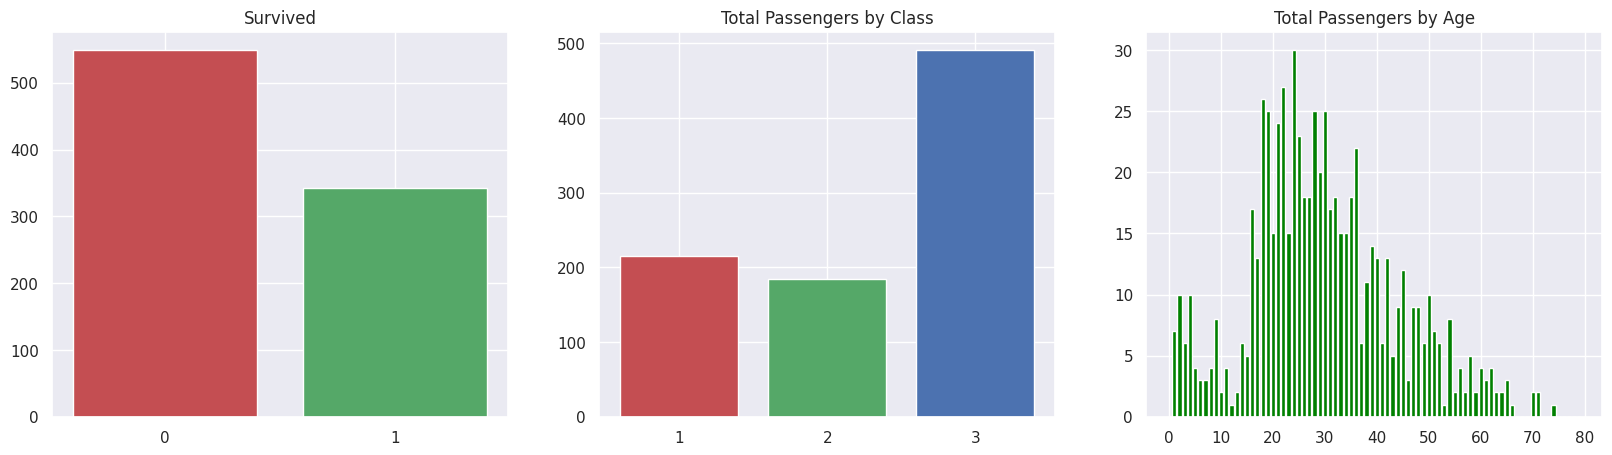

In [6]:
# First we start off with matplotlib and setup the figures and plots
f,ax = plt.subplots(1,3,figsize=(20,5))
colors = ['r', 'g', 'b']

# Now we look at some general distributions of the data.

# Survived Class
x_survived = [0,1]
y_survived = [np.where(train['Survived'] == (i))[0].size for i in x_survived]
ax[0].bar(x_survived, y_survived, color=colors)
ax[0].set_xticks(x_survived)
ax[0].set_title('Survived')


# Passenger Class
x_pclass = [1, 2, 3]
y_pclass = [np.where(train['Pclass'] == (i))[0].size for i in x_pclass]
ax[1].bar(x_pclass, y_pclass, color=colors)
ax[1].set_xticks(x_pclass)
ax[1].set_title('Total Passengers by Class')


# Age
x_age = np.arange(0, 80)
y_age = [np.where(train['Age'] == (i))[0].size for i in x_age]
ax[2].bar(x_age, y_age, color='green')
ax[2].set_xticks(np.arange(0, 81, 10))
ax[2].set_title('Total Passengers by Age')


# Display the graphs
plt.show()

Text(0.5, 1.0, 'Total Passengers by Age')

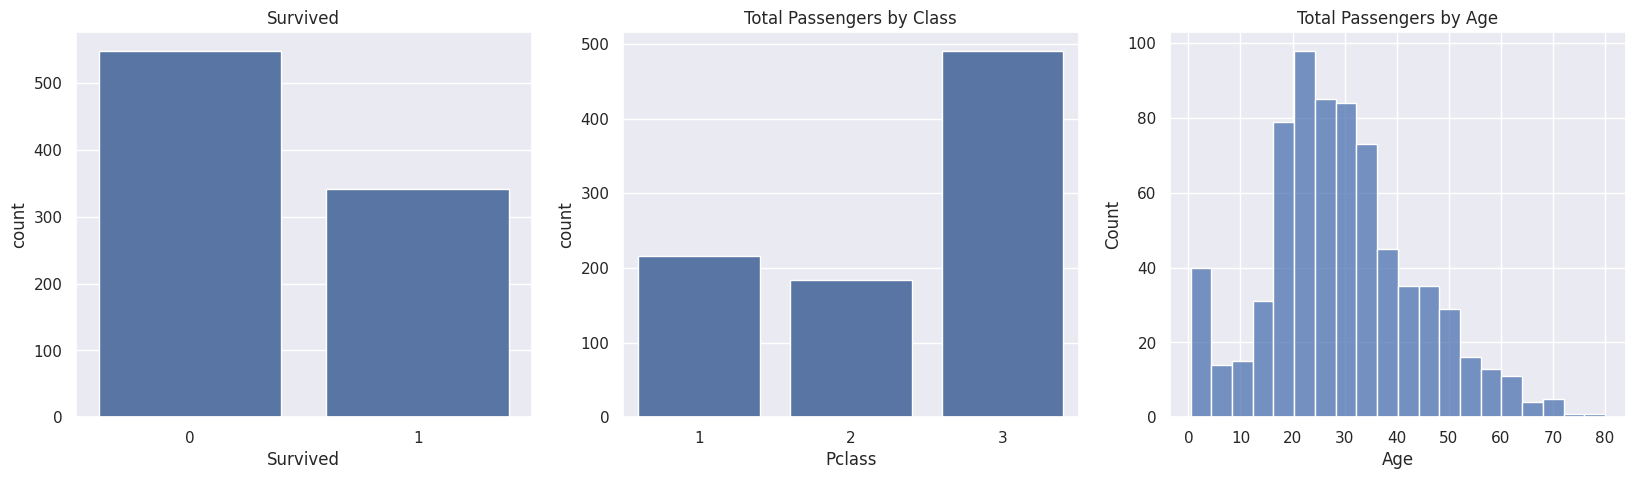

In [7]:
# The categorical histograms we created with matplotlib can be created with the
# "countplot" command in seaborn. The setup is very similar, but easier.

f,ax = plt.subplots(1,3,figsize=(20,5))

sns.countplot(x='Survived',data=train,ax=ax[0])
ax[0].set_title('Survived')

sns.countplot(x='Pclass',data=train,ax=ax[1])
ax[1].set_title('Total Passengers by Class')

sns.histplot(train['Age'].dropna(),ax=ax[2],bins=20, kde = False)
ax[2].set_title('Total Passengers by Age')

<div class="alert alert-block alert-success">
<b>Task:</b> 
<ul>
<li> Plot the absolute numbers of survival with respect to the categories Class, Sex, Embarked, Siblings and Parch using [*seaborn*](https://seaborn.pydata.org/). So in total you should get 5 plots. We will take care of the absolute numbers of survival over the feature fare.
<li> Do not forget to give titles to the plots
<li> Hint: Look at the examples here: https://seaborn.pydata.org/generated/seaborn.countplot.html. You can use settings like above f.ex. the figsize and how to refer to axes.
</li>
</ul>
</div>

Text(0.5, 1.0, 'No of passenger survived pro Embarked')

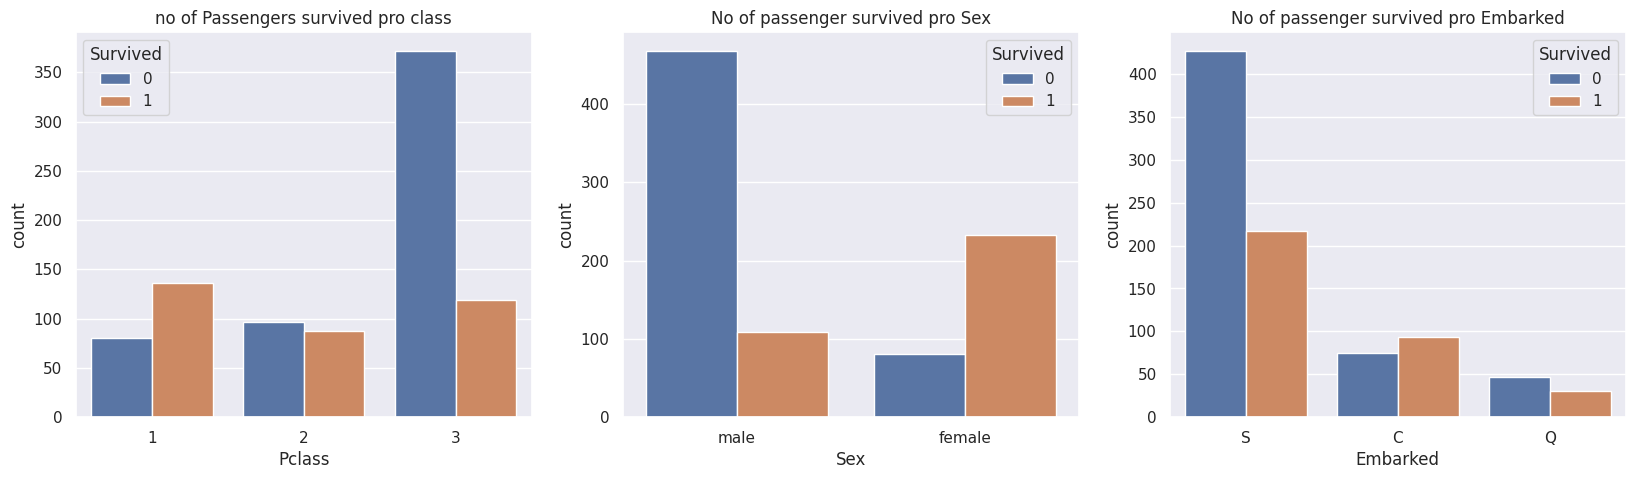

In [8]:
# Plot the survival rate with respect to the Class, Sex and Embarked
# STUDENT CODE HERE (2pt)
f,ax = plt.subplots(1,3,figsize=(20,5))
sns.countplot(x='Pclass', hue='Survived', data=train,ax=ax[0])
ax[0].set_title('no of Passengers survived pro class')

sns.countplot(x='Sex', hue='Survived', data=train,ax=ax[1])
ax[1].set_title('No of passenger survived pro Sex')

sns.countplot(x='Embarked', hue='Survived', data=train,ax=ax[2])
ax[2].set_title('No of passenger survived pro Embarked')

# STUDENT CODE until HERE

Text(0.5, 1.0, 'No of passenger survived pro parch')

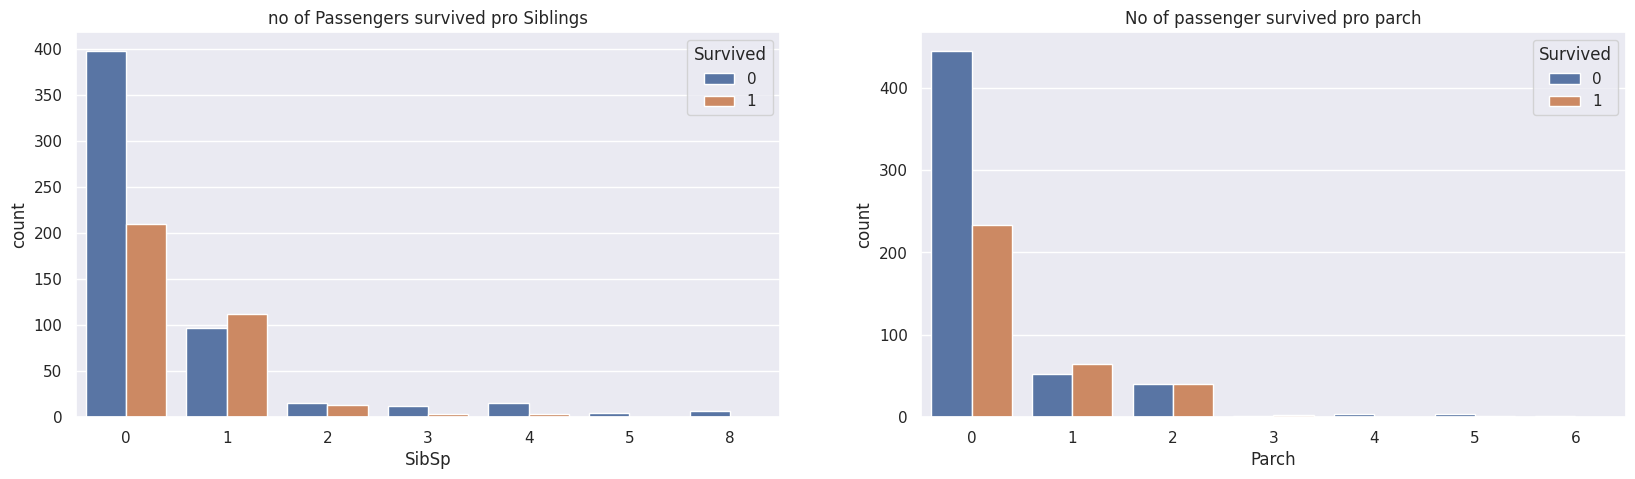

In [9]:
# Plot the survival rate with respect to the Siblings and Parch
# STUDENT CODE HERE (1pt)
f,ax = plt.subplots(1,2,figsize=(20,5))
sns.countplot(x='SibSp', hue='Survived', data=train,ax=ax[0])
ax[0].set_title('no of Passengers survived pro Siblings')

sns.countplot(x='Parch', hue='Survived', data=train,ax=ax[1])
ax[1].set_title('No of passenger survived pro parch')
# STUDENT CODE until HERE

Text(0.5, 1.0, 'Survival Rate by Fare')

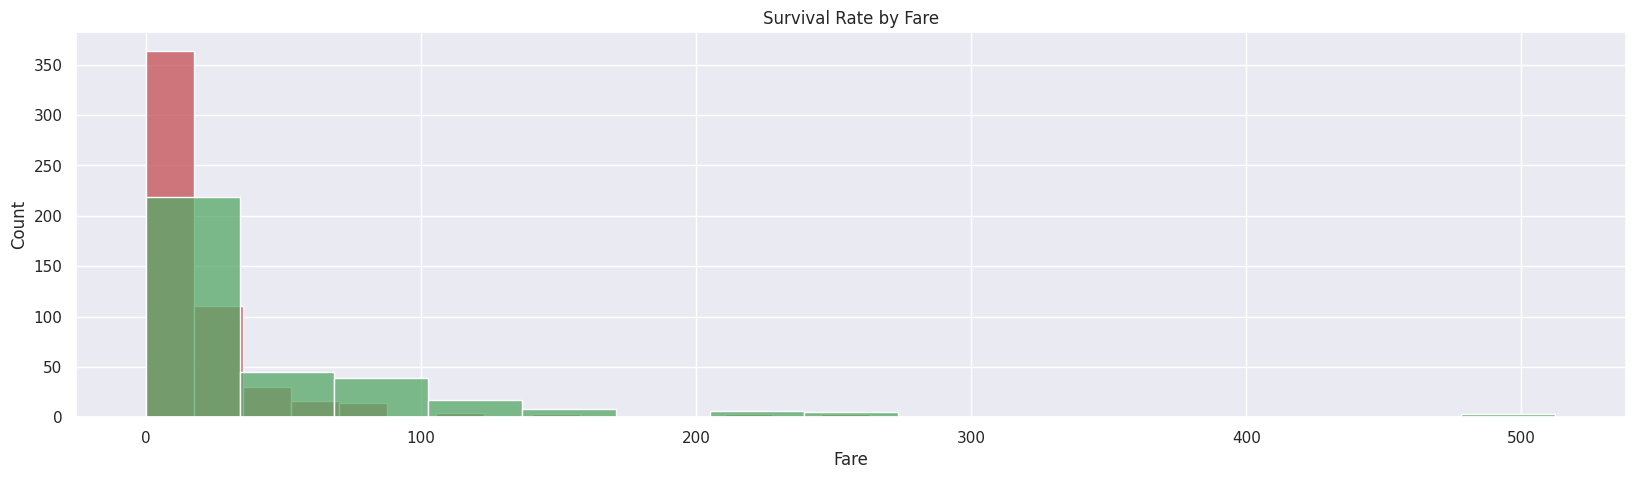

In [10]:
# Using the sns.distplot because of too many bins for usual sns.countplot function
plt.figure(figsize=(20,5))
ax = sns.histplot(train[train['Survived']==0]['Fare'].dropna(),kde=False,color='r',bins=15)
ax = sns.histplot(train[train['Survived']==1]['Fare'].dropna(),kde=False,color='g',bins=15)
ax.set_title('Survival Rate by Fare')

<div class="alert alert-block alert-success">
<b>Question:</b> Which statements can  be made on the basis of the plots ? 
</div>

<div class="alert alert-block alert-success">
<b>Your Answer: the poor ppl have died more, males have died more and the ones who embarked from s have also died more. Ppl travelling with no children or less or parents have died more </b> 
</div>

## Task 1.2 Cleaning up the Data

The most datasets out of real world applications are messy. They include missing values, outliers and invalid data. In order to improve the data quality these values have to be replaced. The resulting gap in the dataset can be closed by interpolation or by dropping the respective entries.

### 1.2.1 Detecting and Filtering Outliers

Outliers that are either very large or small skew the overall view of the data. One way of detecting outliers could be the use of the standard deviation. If we assume that the data is normally distributed, then 95 percent of the data is within 1.96 standard deviations of the mean. So we can drop the values either above or below that range.

<img src="images/outlier.png" />
<p style="text-align: center;">
    Fig. 1 - outlier detection using normal distribution
</p>

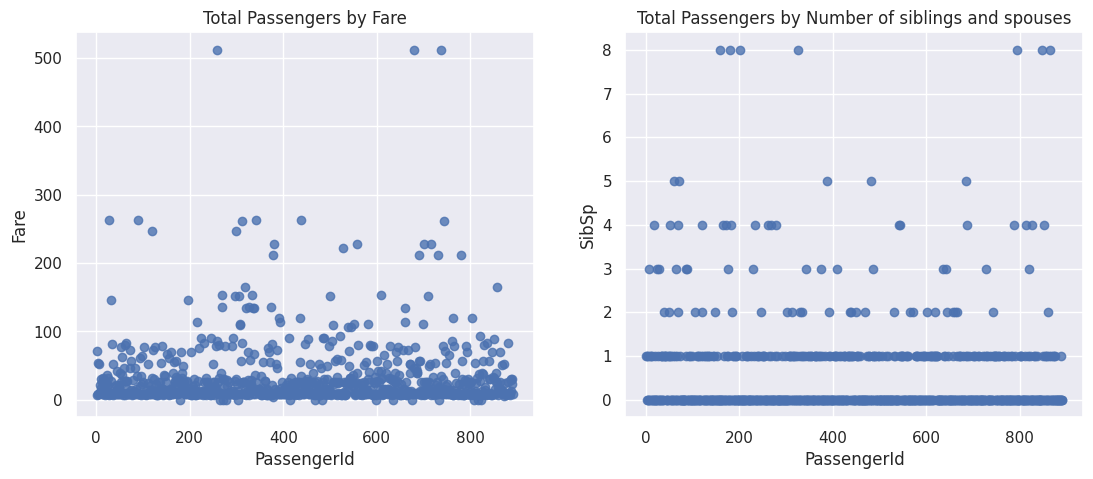

In [11]:
f,ax = plt.subplots(1,2,figsize=(13,5))

# The outliers in Fare (Fare paid by the passenger)
sns.regplot(x=train['PassengerId'], y=train['Fare'], fit_reg=False, ax=ax[0])
# SibSp(Number of siblings and spouses of the passenger aboard)
sns.regplot(x=train['PassengerId'], y=train['SibSp'], fit_reg=False, ax=ax[1])

ax[0].set_title('Total Passengers by Fare')
ax[1].set_title('Total Passengers by Number of siblings and spouses')

plt.show()

<div class="alert alert-block alert-success">
<b>Task:</b> Complete the <code>detect_outliers_sd()</code> function by using its descriptive comments.


</div>

In [12]:
# Outlier detection Method 1 using Standard Deviation
def detect_outliers_sd(df: pd.DataFrame, n_outlier_tolerance: int, features: List[str]) -> List[int]:
    #1. Calculate the mean and standard deviation (std) of our data df
    #2. Add 1.96*std to the mean. Any number greater than this is a suspected outlier
    #3. Subtract 1.96*std from the mean value. Any number less than this is a suspected outlier
    
    
    outlier_indices = []
    for col in features:
        mean: float # Mean
        std: float # Standard deviation
        top: float # Upper bound
        bot: float # Lower bound

        # STUDENT CODE HERE (2pt)

        mean = train[col].mean()
        print(f'für die spalte:{ col} ist er mean : {mean}')
        std = train[col].std()
        print(f'für die spalte:{ col} ist er std : {std}')
        top = 1.96*std + mean
        print(f'für die spalte:{ col} ist er top : {top}')
        bot = mean - 1.96*std
        print(f'für die spalte:{ col} ist er bot : {bot}\n')
        # STUDENT CODE until HERE
    
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < bot) | (df[col] > top)].index       
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = [k for k, v in outlier_indices.items() if v > n_outlier_tolerance]
    
    return multiple_outliers   


# Call the detect outlier function and get the outliers ;)
outliers = detect_outliers_sd(train, 2, ['Age','SibSp','Parch','Fare'])
# Check if all outliers have been caught
assert len(outliers) == 6, f'Expected to find 6 outliers, but found {len(outliers)}'

train.loc[outliers]

für die spalte:Age ist er mean : 29.69911764705882
für die spalte:Age ist er std : 14.526497332334044
für die spalte:Age ist er top : 58.17105241843355
für die spalte:Age ist er bot : 1.2271828756840932

für die spalte:SibSp ist er mean : 0.5230078563411896
für die spalte:SibSp ist er std : 1.1027434322934275
für die spalte:SibSp ist er top : 2.6843849836363076
für die spalte:SibSp ist er bot : -1.6383692709539281

für die spalte:Parch ist er mean : 0.38159371492704824
für die spalte:Parch ist er std : 0.8060572211299559
für die spalte:Parch ist er top : 1.9614658683417618
für die spalte:Parch ist er bot : -1.1982784384876652

für die spalte:Fare ist er mean : 32.204207968574636
für die spalte:Fare ist er std : 49.693428597180905
für die spalte:Fare ist er top : 129.6033280190492
für die spalte:Fare ist er bot : -65.19491208189993



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.55,C22 C26,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.00,5,2,CA 2144,46.90,NaN,S
438,439,0,1,"Fortune, Mr. Mark",male,64.00,1,4,19950,263.00,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.00,3,2,19950,263.00,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.00,3,2,19950,263.00,C23 C25 C27,S


<div class="alert alert-block alert-success">
<b>Task:</b> Complete the <code>detect_outliers_iqr()</code> function by using its descriptive comments. Use the function <code>np.nanpercentile</code>.
</div>

In [13]:
# Outlier detection Method 2 using Interquartile Ranges 
def detect_outliers_iqr(df: pd.DataFrame, n_outlier_tolerance: int, features: List[str]) -> List[int]:
    #1. Calculate the interquartile range (IQR) for our data df 
    #2. Multiply the IQR by the number 1.5
    #3. Add 1.5*IQR to the third quartile. Any number greater than this is a suspected outlier
    #4. Substract 1.5*IQR from the first quartile. Any number less than this is a suspected outlier
    #5. Add the rule to determine the indices of outliers as well!!
    
    outlier_indices = []
    # iterate over features(columns)
    for col in features:
        # STUDENT CODE HERE (3pt)
        Q1 = np.nanpercentile(train[col], 25)
        Q3 = np.nanpercentile(train[col], 75)
        IQR = (Q3-Q1) * 1.5
        top = IQR + Q3
        bot = Q1 - IQR
        outlier_list_col = df[(df[col] < bot) | (df[col] > top)].index 
        
        # STUDENT CODE until HERE
        
        # append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)

    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = [k for k, v in outlier_indices.items() if v > n_outlier_tolerance]
    

    return multiple_outliers


# Call the detect outlier function and get the outliers ;)
outliers = detect_outliers_iqr(train, 2, ['Age','SibSp','Parch','Fare'])
# Check if all outliers have been caught
assert len(outliers) == 11, f'Expected to find 11 outliers, but found {len(outliers)}'

train.loc[outliers]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.00,B22,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S


In [14]:
# Drop the outliers if they have not been dropped already
if (len(train) == 891):
    train = train.drop(outliers, axis = 0).reset_index(drop=True)
    print(f'Dropped {len(outliers)} outliers')
else:
    print('Outliers have been dropped already')

Dropped 11 outliers


### 1.2.2 Complementary functions

In the most cases Machine Learning algorithms cannot work with missing values. Therefore, we have to create a few functions
to solve that problem.

In [15]:
# The .info function shows how complete or incomplete the datasets train/test are. 
print(train.isnull().sum())
print('-'*30)
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
dtype: int64
------------------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64


<div class="alert alert-block alert-info">
<b>Note:</b> We can complete missing data by calculating:
<ul>
<li> Mean
<li> Median
<li> Mean + Randomized Standard Deviation
</li>
</ul>
<br>
Before we can complete the missing data, we should decide which method is best based on the description of the data.
</div>

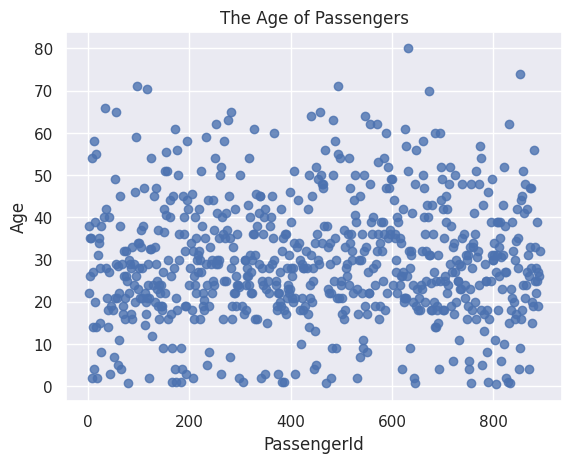

In [16]:
# The outliers in Age 
sns.regplot(x=train['PassengerId'], y=train['Age'], fit_reg=False)
plt.title('The Age of Passengers')
plt.show()

In [17]:
# Fills the missing data in Age by using mean + randomized standard deviation. 

for dataset in datasets:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)  
    df_age = dataset['Age'].copy()
    df_age[np.isnan(df_age)] = age_null_random_list
    dataset['Age'] = df_age.astype(int)

In [18]:
# The Description of Fare
print (f'median {train["Fare"].median():>10}')
train['Fare'].describe()

median    14.4271


count    880.000000
mean      31.076249
std       48.004681
min        0.000000
25%        7.895800
50%       14.427100
75%       30.500000
max      512.329200
Name: Fare, dtype: float64

In [19]:
# Fills the missing data in Fare using median standard deviation.
for dataset in datasets:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())

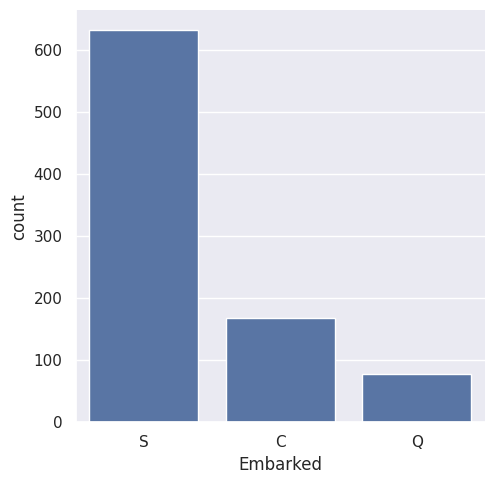

In [20]:
sns.catplot(x='Embarked',data=train,kind='count')
plt.show()

In [21]:
# Replaces Missing Values with Southampton (S) for Embarked class
for dataset in datasets:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [22]:
# Updates the dataframes
train = datasets[0]
test = datasets[1]
# any: Can detect if a cell matches a condition very quickly
print(train.isnull().any())
print('-'*30)
print(test.isnull().any())

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
dtype: bool
------------------------------
PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
Survived       False
dtype: bool


## Task 2: Feature Engineering

Qualitative data is often nominal (e.g. names) or categorical (e.g. sex). Those can't be ordered and are difficult to evaluate. Therefore we want to convert all our variables to quantitiative data, i.e. numerical or ordinal values.

We can convert the names to attribute based on their length:

In [23]:
for dataset in datasets:
    try:
        dataset['Name_length'] = dataset['Name'].apply(len)
    except:
        print('Name_length feature is located in the data frame')
        
train['Name_length'].head()

0    23
1    51
2    22
3    44
4    24
Name: Name_length, dtype: int64

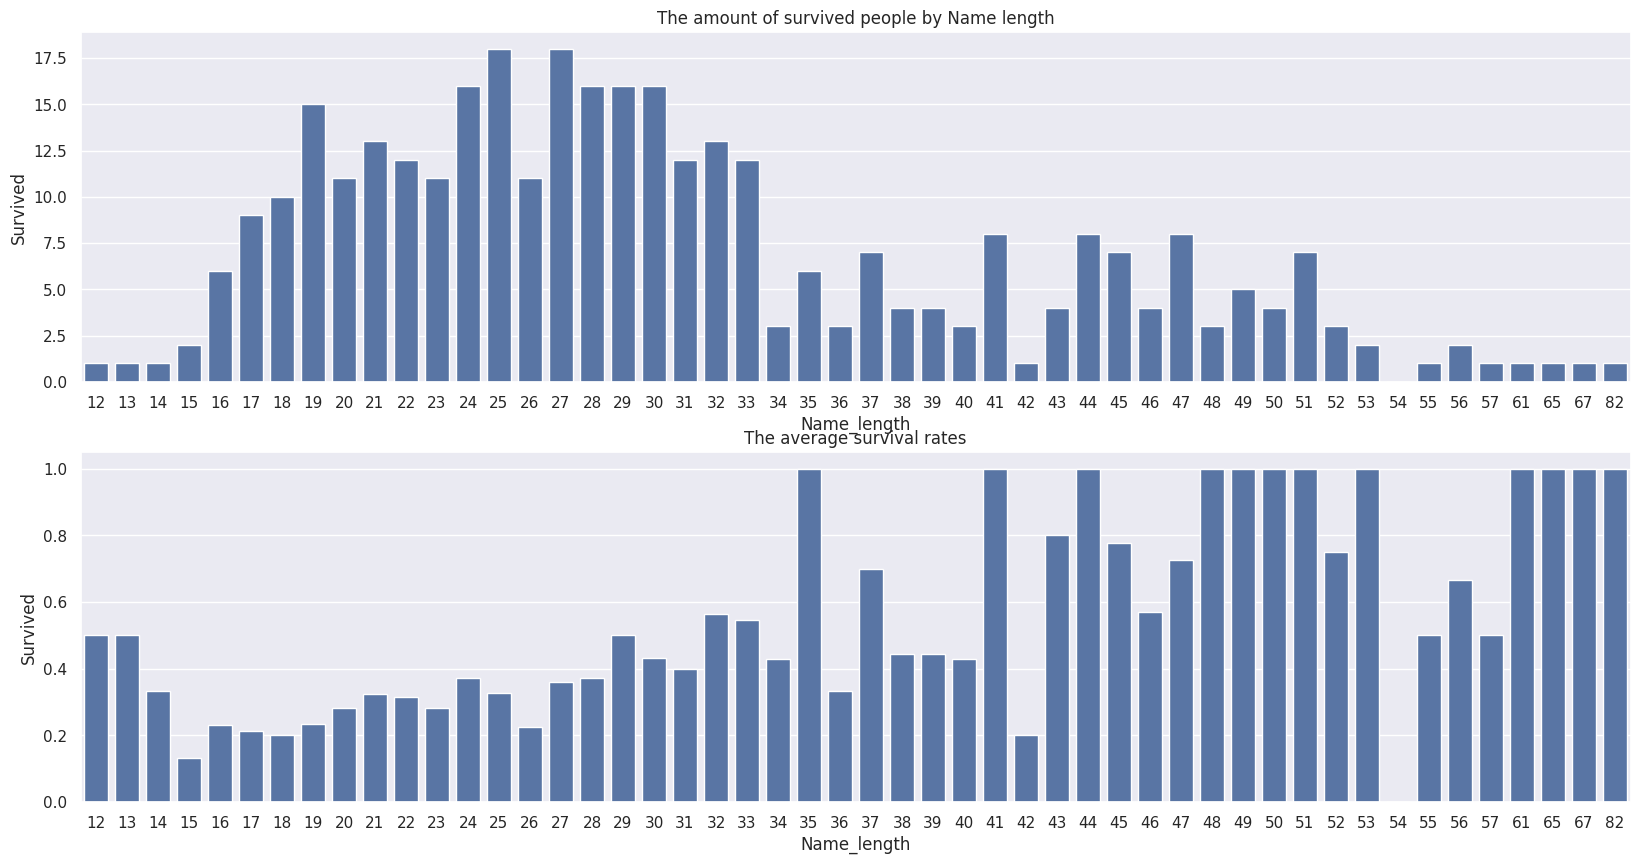

In [24]:
fig, ax = plt.subplots(2,1,figsize=(20,10))

# The amount of survived people by Name length.
sum_Name = train[['Name_length', 'Survived']].groupby(['Name_length'],as_index=False).sum()
sns.barplot(x='Name_length', y='Survived', data=sum_Name, ax = ax[0])
ax[0].set_title('The amount of survived people by Name length')

# The amount of survived people by Name length.
average_Name = train[['Name_length', 'Survived']].groupby(['Name_length'],as_index=False).mean()
sns.barplot(x='Name_length', y='Survived', data=average_Name, ax = ax[1])
ax[1].set_title('The average survival rates')

plt.show()

<div class="alert alert-block alert-success">
<b>Question:</b> What do you conclude from the graphics above ?
</div>

<div class="alert alert-block alert-success">
<b>Your Answer:</b> 
</div>

It can also be helpful to create meaningful "bins" for attributes. Therefore we will divide the Name_length feature into small classes.

In [25]:
for dataset in datasets:
    dataset.loc[ dataset['Name_length'] <= 23, 'Name_length_bin']= 0
    dataset.loc[(dataset['Name_length'] > 23) & (dataset['Name_length'] <= 28), 'Name_length_bin']= 1
    dataset.loc[(dataset['Name_length'] > 28) & (dataset['Name_length'] <= 40), 'Name_length_bin']= 2
    dataset.loc[ dataset['Name_length'] > 40, 'Name_length_bin'] = 3
train['Name_length_bin'].value_counts()

Name_length_bin
0.0    360
1.0    240
2.0    201
3.0     90
Name: count, dtype: int64

<div class="alert alert-block alert-success">
<b>Task:</b> In the next step: You are going to map the gender feature.

<b>Use the following instructions:</b> 
<ul>
  <li>Iterate over train and test set (list of panda dataframes)</li>
  <li>Because you are overwriting an already existing column, make sure you are not overwriting already altered data, keep in mind that the assigned values should only change on the first iteration of running this cell.</li>
  <li>Use np.where to convert females to 1 and males to 0</li>
  <li>Look if your conversion worked out as planned (<code>.head()</code> method) </li>
</ul>
</div>

In [26]:
# STUDENT CODE HERE (2pt)
for name, df in [("train", train), ("test", test)]:
    print(f"\nProcessing {name} set")
    if df['Sex'].dtype == object:
        df['Sex'] = np.where(df['Sex'] == "female", 1, 0)
    else:
        print(f"Skipping conversion for {name}: 'Sex' column is already of type {df['Sex'].dtype}")
        
    print(f"{name} head:")
    print(df.head(5))


# STUDENT CODE until HERE

# Check if the gender feature has been mapped correctly
assert train['Sex'].sum() == 314 , f'Expected 314 females, but found {train["Sex"].sum()} females'
assert test['Sex'].sum() == 152 , f'Expected 152 females, but found {test["Sex"].sum()} females'



Processing train set
train head:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex  Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0   22      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1   38      1      0   
2                             Heikkinen, Miss. Laina    1   26      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1   35      1      0   
4                           Allen, Mr. William Henry    0   35      0      0   

             Ticket     Fare Cabin Embarked  Name_length  Name_length_bin  
0         A/5 21171   7.2500   NaN        S           23              0.0  
1          PC 17599  71.2833   C85        C           51              3.0  
2  STON/O2. 3101282   7.9250   NaN      

Have a look on the age feature!

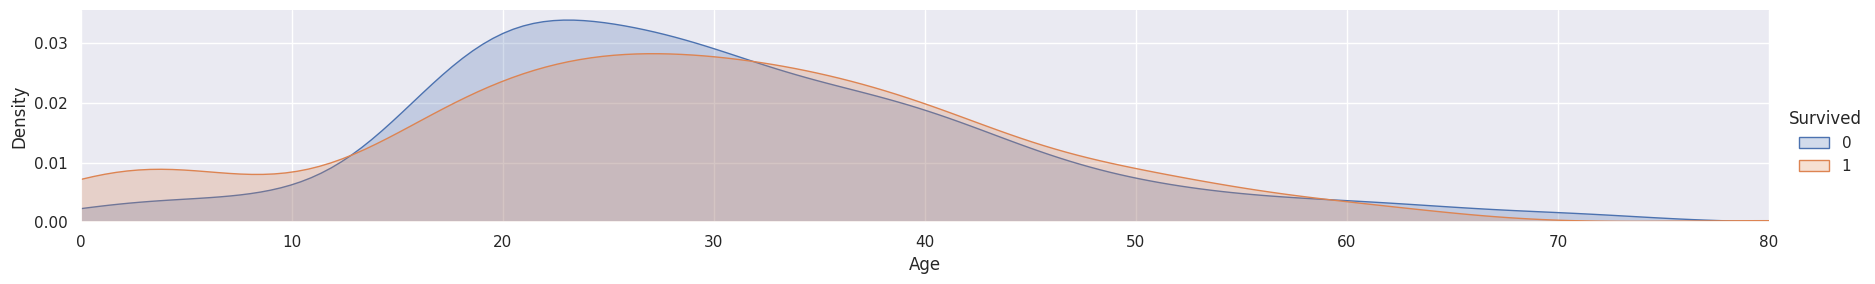

In [27]:
#Plots distributions of age of passengers who survived or did not survive
a = sns.FacetGrid( train, hue = 'Survived', aspect=6 )
a.map(sns.kdeplot, 'Age', fill=True )
a.set(xlim=(0 , train['Age'].max()))
a.add_legend()

<div class="alert alert-block alert-success">
<b>Question:</b> Which statements can be made about the graphic/plot above with respect to building some bins out of the feature age ? 
</div>

<div class="alert alert-block alert-success">
<b>Your Answer:</b> 


</div>

<div class="alert alert-block alert-success">
<b>Task:</b> Try to map the *Age* feature according to the plot and your given answer into an *Age_bin* category:
<b>Use the following instructions:</b> 
<ul>
  <li>Iterate over train and test set</li>
  <li>Use <code>.loc()</code> method to find values that lay inside your bins and logical operations </li>
  <li>Use the following thresholds to obtain 6 possible values/intervals for the new Age_bin feature (0/14/30/40/50/60/60+). The thresholds should be included in the lower adjacent bin. </li>
  <li>Convert the newly created column to <code>int</code> to avoid problems with the upcoming checkpoint.

</li>
</ul>
</div>

In [28]:
# STUDENT CODE HERE (2pt)
dataset = [train,test]
for dataset in datasets:
    dataset.loc[dataset['Age'] <= 14, 'Age_bin'] = 0     # 0-14
    dataset.loc[(dataset['Age'] > 14) & (dataset['Age'] <= 30), 'Age_bin'] = 1 # 15-30
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 40), 'Age_bin'] = 2 # 31-40
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 50), 'Age_bin'] = 3 # 41-50
    dataset.loc[(dataset['Age'] > 50) & (dataset['Age'] <= 60), 'Age_bin'] = 4 # 51-60
    dataset.loc[dataset['Age'] > 60, 'Age_bin'] = 5                       # 60+
    
    # Convert to integer type, using 'Int64' to handle potential NaNs in Age gracefully
    dataset['Age_bin'] = dataset['Age_bin'].fillna(-1).astype('int64')
# STUDENT CODE until HERE
   
# Output the sum of passengers distributed into each new "Age_bin"
print(train['Age_bin'].value_counts())

# Sanity check - compare your results
test_func.test_train_age_bins(train)

Age_bin
1    433
2    210
3    106
0     78
4     42
5     22
Name: count, dtype: int64
Your data looks alright, you can continue with the workbook.


<div class="alert alert-block alert-success">
<b>Task:</b> 
<b>Use the following instructions:</b> 
<ul>
  <li>The next step is to map the Embarked feature to 0,1,2, such that S is equivalent to 0, C is equivalent to 1 and Q is equivalent to 2. </li>
  <li>Hint: Use the function 'replace' for the dataframes in datasets and set the parameter inplace to True </li>
</ul>
</div>

In [29]:
# STUDENT CODE HERE (1pt)
for dataset in datasets: 
    dataset['Embarked'] = dataset['Embarked'].replace(to_replace=['S', 'C', 'Q'], value=[0, 1, 2])
# STUDENT CODE until HERE

# Sanity check
assert train['Embarked'].dtypes == 'int64', f'The type of data expected for the "Embarked" feature was type int64, but found {train["Embarked"].dtypes} instead'
assert test['Embarked'].dtypes == 'int64', f'The type of data expected for the "Embarked" feature was type int64, but found {test["Embarked"].dtypes} instead'

train['Embarked'].head(10)

/tmp/ipykernel_4169/1878032391.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['Embarked'] = dataset['Embarked'].replace(to_replace=['S', 'C', 'Q'], value=[0, 1, 2])


0    0
1    1
2    0
3    0
4    0
5    2
6    0
7    0
8    0
9    1
Name: Embarked, dtype: int64

Additionally the data might be skewed. For example, if we look at the *Fare* attribute, we can see it is heavily skewed to the left:

<Axes: xlabel='Fare', ylabel='Count'>

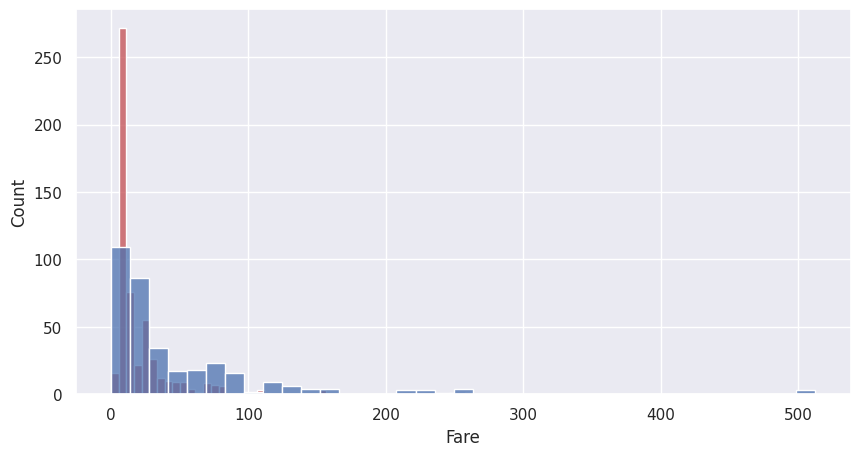

In [30]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(train['Fare'][train['Survived'] == 0], color='r')
sns.histplot(train['Fare'][train['Survived'] == 1], color='b')

<div class="alert alert-block alert-success">
<b>Task:</b> Reduce the skewedness of this feature by transforming it with the log-function. There create a new column Fare_log.
    
<b>Use the following instructions:</b> 
<ul>
  <li>Iterate over train and test set</li>
  <li>Use <code>.map()</code> method and define in it a function lambda that returns the log of the value only if the values is positive, otherwise return 0 </li>
  <li>You can use an if-statement just like there, see also: https://datatofish.com/if-condition-in-pandas-dataframe/</li>
  <li>Display your new feature as a histogram or density plot of the survived as well as the deceased passengers. 

</li>
</ul>
</div>

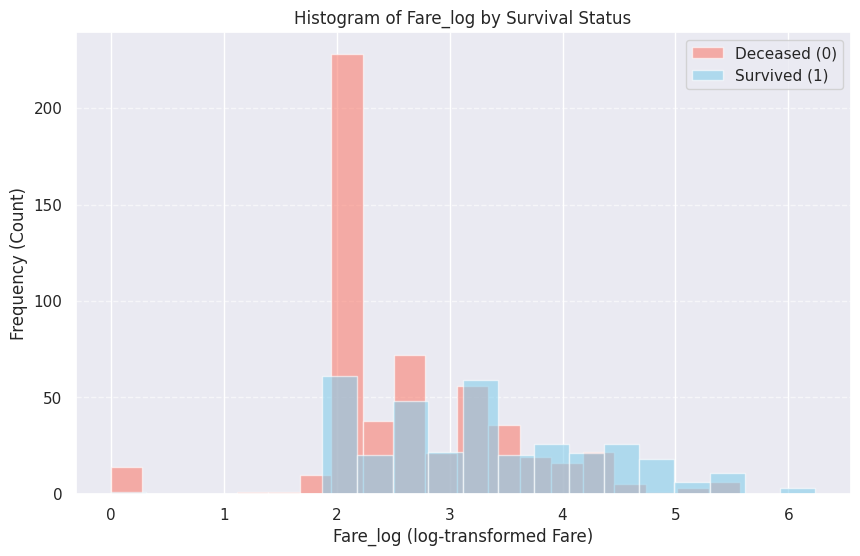

In [31]:
# STUDENT CODE HERE (3pt)
for dataset in datasets:
    dataset['Fare_log'] = dataset['Fare'].map(lambda x: np.log(x) if x > 0 else 0)
survived_log = train[train['Survived'] == 1]['Fare_log']
deceased_log = train[train['Survived'] == 0]['Fare_log']

plt.figure(figsize=(10, 6))
plt.hist(deceased_log, bins=20, alpha=0.6, label='Deceased (0)', color='salmon')
plt.hist(survived_log, bins=20, alpha=0.6, label='Survived (1)', color='skyblue')

plt.title('Histogram of Fare_log by Survival Status')
plt.xlabel('Fare_log (log-transformed Fare)')
plt.ylabel('Frequency (Count)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()    

# STUDENT CODE until HERE

<div class="alert alert-block alert-success">
<b>Question:</b> What can you see if you plot the survival rate over the Fare_log? Analyse the graph!
    <ul>
        <li>Hint: Use the same function we used to plot in the first section.
</div>

<div class="alert alert-block alert-success">
<b>Your Answer:</b> 
</div>

In [32]:
# Maps Fare_log into the *Fare_bin* feature
for dataset in datasets:
    dataset.loc[ dataset['Fare_log'] <= 2.7, 'Fare_bin'] = 0
    dataset.loc[ dataset['Fare_log'] > 2.7, 'Fare_bin'] = 1
    dataset['Fare_bin'] = dataset['Fare_bin'].astype(int)
train['Fare_bin'].value_counts()

Fare_bin
0    457
1    434
Name: count, dtype: int64

In [33]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_length,Name_length_bin,Age_bin,Fare_log,Fare_bin
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,0,23,0.0,1,1.981001,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,1,51,3.0,2,4.266662,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,0,22,0.0,1,2.070022,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,0,44,3.0,2,3.972177,1
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,0,24,1.0,2,2.085672,0


## Task 3: Feature Selection

Feature selection methods can be used to identify and remove unneeded, irrelevant and redundant properties from the data that should not contribute to the overall accurarcy.

<div class="alert alert-block alert-success">
<b>Task:</b> Try to find a feature that is not relevant for our data analysis and drop it with the features Name and Ticket.
<b>Use the following instructions:</b> 
<ul>
  <li>Use the <code>.info()</code> method to look on how complete or incomplete your dataset is</li>
  <li>Determine the third feature beside Name and Ticket and drop all 3 from train and test set</li>


</li>
</ul>
</div>

In [34]:
# Find it

# STUDENT CODE HERE (1pt)
train.info()
# STUDENT CODE until HERE

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Survived         891 non-null    int64  
 2   Pclass           891 non-null    int64  
 3   Name             891 non-null    object 
 4   Sex              891 non-null    int64  
 5   Age              891 non-null    int64  
 6   SibSp            891 non-null    int64  
 7   Parch            891 non-null    int64  
 8   Ticket           891 non-null    object 
 9   Fare             891 non-null    float64
 10  Cabin            204 non-null    object 
 11  Embarked         891 non-null    int64  
 12  Name_length      891 non-null    int64  
 13  Name_length_bin  891 non-null    float64
 14  Age_bin          891 non-null    int64  
 15  Fare_log         891 non-null    float64
 16  Fare_bin         891 non-null    int64  
dtypes: float64(3), i

In [35]:
# Remove them

# STUDENT CODE HERE (2pt)
features_to_drop = ['Name_length_bin', 'Name', 'Ticket']

# Drop the columns from the training set, assigning the result back.
train = train.drop(columns=features_to_drop)

# Drop the columns from the test set, assigning the result back.
test = test.drop(columns=features_to_drop)
# STUDENT CODE until HERE

# Look at the final dataset
print(train.head())

# Sanity check - compare your results
test_func.test_train_feature_selection(train)

   PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch     Fare Cabin  \
0            1         0       3    0   22      1      0   7.2500   NaN   
1            2         1       1    1   38      1      0  71.2833   C85   
2            3         1       3    1   26      0      0   7.9250   NaN   
3            4         1       1    1   35      1      0  53.1000  C123   
4            5         0       3    0   35      0      0   8.0500   NaN   

   Embarked  Name_length  Age_bin  Fare_log  Fare_bin  
0         0           23        1  1.981001         0  
1         1           51        2  4.266662         1  
2         0           22        1  2.070022         0  
3         0           44        2  3.972177         1  
4         0           24        2  2.085672         0  
Your data looks alright, you can continue with the workbook.


## Task 3.1. Correlation analysis - Multi-variate analysis

<div class="alert alert-block alert-info">
<b>Note:</b> 
<ul>
<li> Basically, correlation measures how closely two variables move in the same direction. Therefore we try to find whether there is a correlation between a feature and a label. In other words as the feature values change does the label change as well, and vice-versa?
<li>  The data may contain a lot of information redundancy distributed among multiple variables, which is a problem called multivariate correlation.

</li>
</ul>
</div>

In order to set up another correlation diagram it is benefical to read the [*seaborn heatmap*](https://seaborn.pydata.org/generated/seaborn.heatmap.html) documentary.
Have a look at this nice correlation diagram.

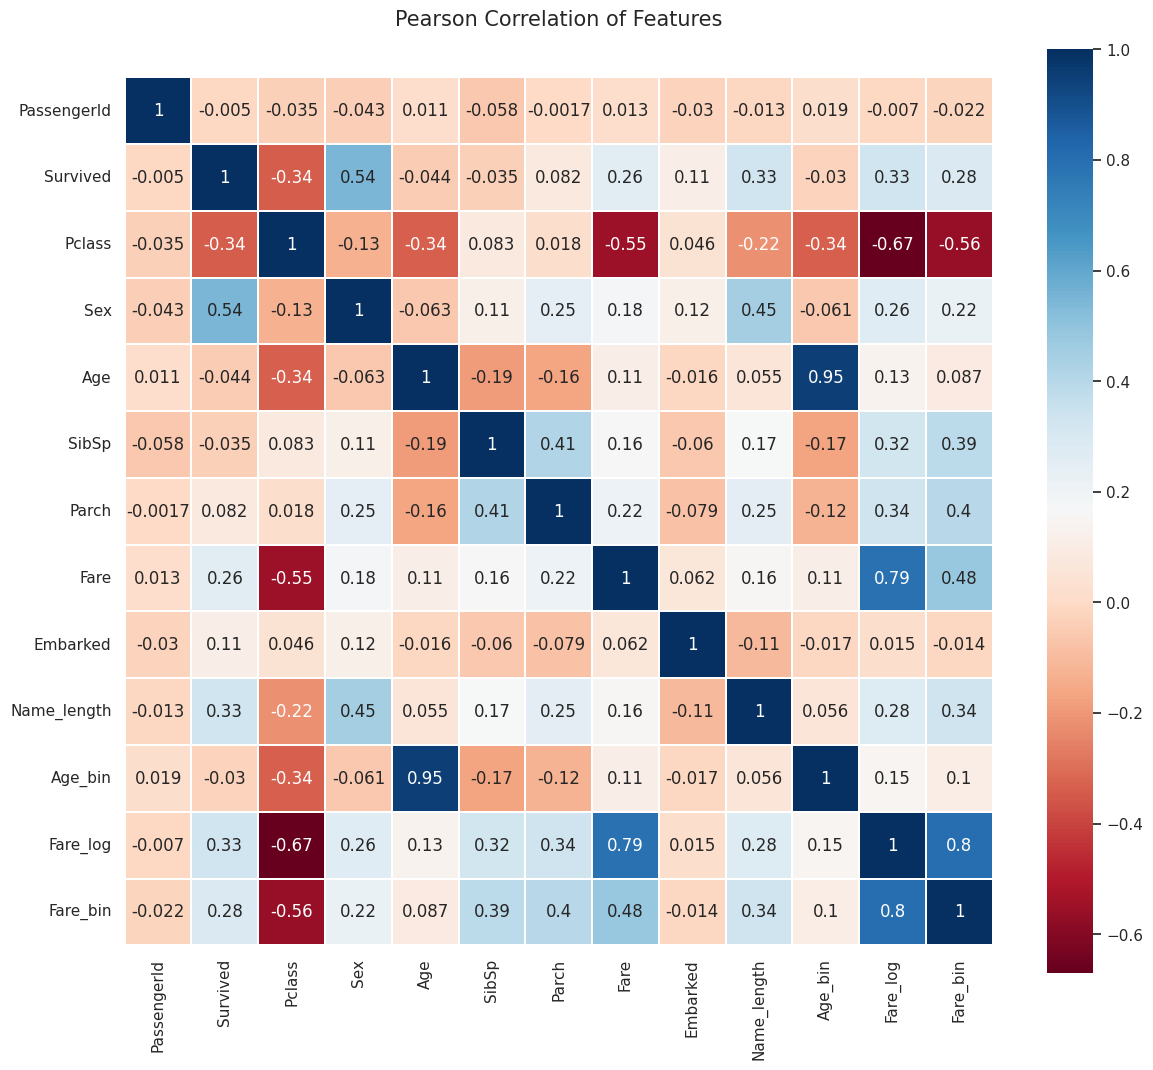

In [36]:
numerical_columns = train.select_dtypes(include=[np.number]).columns
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train[numerical_columns].corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

We will drop the following features as well. It is not necessary, but we will reduce dimensions a little bit for the upcoming supervised learning algorithms. 

In [37]:
# Feature selection
drop_elements = ['PassengerId', 'SibSp', 'Age_bin','Embarked']

train = train.drop(drop_elements, axis = 1)
test  = test.drop(drop_elements, axis = 1)

Normally you would use the dataset from now on, but because this is a task we saved the prepared dataset by the solution and you can load it in the supervised algorithms.